# Environment Setup

In [ ]:
#pip install "gym==0.19.0"

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import sys
sys.path.append('/content/drive/MyDrive/Capstone/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#pip install stable-baselines3[extra]

In [ ]:
import random
import pandas as pd
import numpy as np
import datetime
from Environments.WM import WMEnv
import matplotlib.pyplot as plt

In [ ]:
from stable_baselines3 import PPO

# Data Preparation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/Datasets/df.csv')

#Preset env
env = WMEnv(df, 8, 22, 8, 5, 5, 1, 'training')

In [ ]:
timeSteps = [20000, 25000, 30000]
energyLimits = [3, 5]
penaltyTimes = [i for i in range(1, 4)]
penaltyEnergyLimits = [i for i in range(1, 4)]
penaltyOperationTimes = [i for i in range(1, 4)]
print(energyLimits, timeSteps, penaltyTimes, penaltyEnergyLimits, penaltyOperationTimes)

[3, 5] [20000, 25000, 30000] [1, 2, 3] [1, 2, 3] [1, 2, 3]


# Defined functions

In [ ]:
def PPOTrial(df, tS, st, et, eL, pT, pE, pO, mode='training'):
    env = WMEnv(df, 8, 22, eL, pT, pE, pO,mode)
    model = PPO("MlpPolicy", env, verbose=0)
    model.learn(total_timesteps=tS, progress_bar=True)      
    model.save('/content/drive/MyDrive/Capstone/ppo/ppo_timeSteps'+str(tS)+'_sT'+str(st)+'_eT'+str(et)+'_eL'+str(eL)+'_pT'+str(pT)+'_pE'+str(pE)+'_pO'+str(pO))


In [ ]:
def PPOLoad(tS, st, et, eL, pT, pE, pO):
  model = PPO.load('/content/drive/MyDrive/Capstone/ppo/ppo_timeSteps'+str(tS)+'_sT'+str(st)+'_eT'+str(et)+'_eL'+str(eL)+'_pT'+str(pT)+'_pE'+str(pE)+'_pO'+str(pO))
  return model

In [ ]:
def generateGraph(model, tS, st, et, eL, pT, pE, pO):
  date = []
  time = []
  price = []
  en_cost = []
  total_en = []

  for episode in range(5): 
    s = env.reset()
    while True:
      action, _states = model.predict(s)
      date.append(env.cur_date)
      time.append(env.time)
      price.append(env.price)
      s_, rewards, done, info = env.step(action)
      en_cost.append(env.cur_energy)
      s = s_
      if done:
        total_en.append(env.total_energy_cost)
        break

  re = pd.DataFrame({'date':date, 't':time, 'energy_cost':en_cost, 'price':price })
  d = list(re.date.unique())
  plt.clf()
  fig, axes = plt.subplots(5,1,figsize = (15,15))
  plt.subplots_adjust(hspace = 0.3)
  for i in range(5):
    axes2 = axes[i].twinx()
    axes[i].plot(re[re.date == d[i]].t, re[re.date == d[i]].price, color = 'orange')
    axes2.bar(re[re.date == d[i]].t, re[re.date == d[i]].energy_cost, color = 'skyblue')
    axes2.set_ylim([0, 1.5])
    axes[i].grid()
    axes[i].title.set_text(d[i] + ' The total energy of all appliances = ' + str(total_en[i]))
    axes[i].legend(['TOU price'])
    plt.xticks(np.arange(0,24))
  fig.suptitle('Graph of ppo_timeSteps'+str(tS)+'_sT'+str(st)+'_eT'+str(et)+'_eL'+str(eL)+'_pT'+str(pT)+'_pE'+str(pE)+'_pO'+str(pO), fontsize=16)
  fig1 = plt.gcf()
  #plt.show()
  fig1.savefig('/content/drive/MyDrive/Capstone/ppoGraph/ppo_timeSteps'+str(tS)+'_sT'+str(st)+'_eT'+str(et)+'_eL'+str(eL)+'_pT'+str(pT)+'_pE'+str(pE)+'_pO'+str(pO)+'.png')
 

# Single Trial

Output()

2016-02-10
0       True
1       True
2       True
3       True
4       True
       ...  
115    False
116    False
117    False
118    False
119    False
Name: date, Length: 120, dtype: bool
2016-03-27
0      False
1      False
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Name: date, Length: 120, dtype: bool
2016-07-27
0      False
1      False
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Name: date, Length: 120, dtype: bool
2016-03-05
0      False
1      False
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Name: date, Length: 120, dtype: bool
2016-12-03
0      False
1      False
2      False
3      False
4      False
       ...  
115     True
116     True
117     True
118     True
119     True
Name: date, Length: 120, dtype: bool


<Figure size 432x288 with 0 Axes>

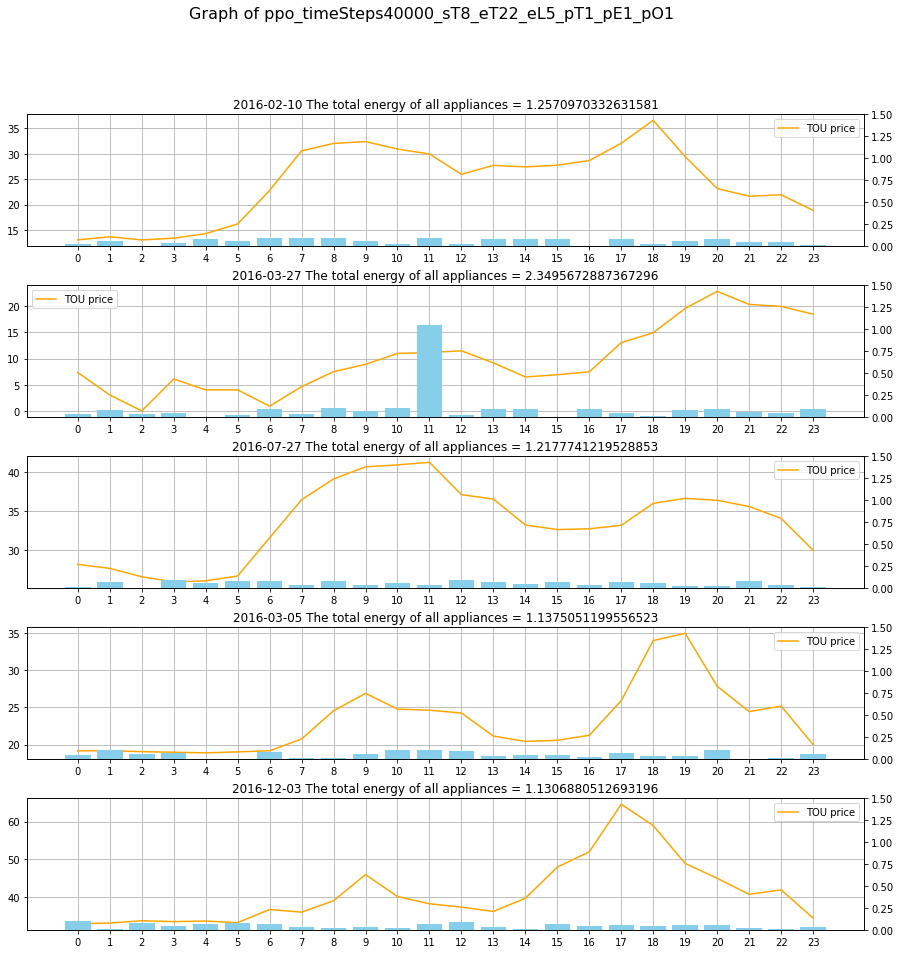

In [ ]:
# PPOTrial(df, 40000, 8, 22, 5, 1, 1, 1)
# model = PPOLoad(40000, 8, 22, 5, 1, 1, 1)
# generateGraph(model,40000, 8, 22, 5, 1, 1, 1)

for tS in timeSteps:
  for eL in energyLimits:
    for pT in penaltyTimes:
      for pE in penaltyEnergyLimits:
        for pO in penaltyOperationTimes:
          PPOTrial(df,tS, 8, 22, eL, pT, pE, pO)
      

# Hyperparameter Tuning

In [ ]:
# timeSteps = [i for i in range(1000, 30001, 30000)]
# energyLimits = [i for i in range(7, 9)]
# penaltyTimes = [i for i in range(9, 11)]
# penaltyEnergyLimits = [i for i in range(9, 11)]
# penaltyOperationTimes = [i for i in range(9, 11)]
for tS in timeSteps:
  for eL in energyLimits:
    for pT in penaltyTimes:
      for pE in penaltyEnergyLimits:
        for pO in penaltyOperationTimes:
          PPOTrial(df, tS, 8, 22, eL, pT, pE, pO)
         

  86% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━ 17,176/20,000  [ 0:01:56 < 0:00:19 , 151 it/s ]

In [ ]:
for tS in timeSteps:
  for eL in energyLimits:
    for pT in penaltyTimes:
      for pE in penaltyEnergyLimits:
        for pO in penaltyOperationTimes:
          model = PPOLoad(tS, 8, 22, eL, pT, pE, pO)
          generateGraph(model, tS, 8, 22,  eL, pT, pE, pO)